Name : Priyadharshini R
Roll No : 24BAD092
Mean Squared Error : 207.89880810008412
Root Mean Squared Error : 14.418696477146751
R2 Score : 0.03017148927257729
Regression Coefficients:
                             Coefficient
study_hours                     0.264675
attendance_percentage          -0.093385
parental level of education    -1.020876
test preparation course        -3.874387
sleep_hours                     0.486244


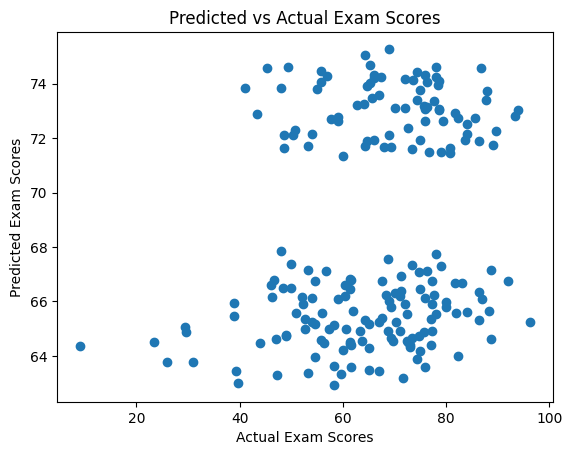

<Figure size 640x480 with 0 Axes>

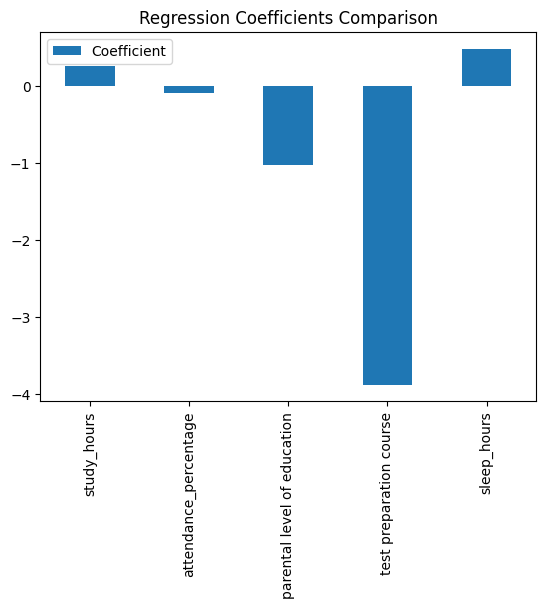

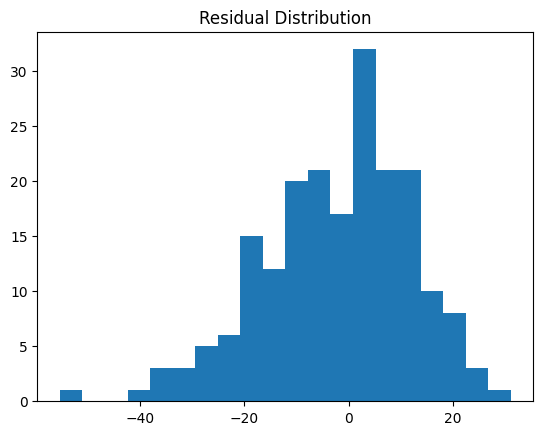

In [2]:
# Printing student details in output
print("Name : Priyadharshini R")
print("Roll No : 24BAD092")

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv(r"/content/sample_data/StudentsPerformance.csv")

# Create target variable: Final Exam Score (average of math, reading, writing)
df["Final_Score"] = (df["math score"] +
                     df["reading score"] +
                     df["writing score"]) / 3

# Encode categorical variables
le = LabelEncoder()
df["parental level of education"] = le.fit_transform(df["parental level of education"])
df["test preparation course"] = le.fit_transform(df["test preparation course"])

# Add synthetic columns to match Scenario 1
np.random.seed(42)  # For reproducibility
df["study_hours"] = np.random.randint(1, 6, size=len(df))         # 1–5 hours/day
df["attendance_percentage"] = np.random.randint(60, 101, size=len(df))  # 60–100%
df["sleep_hours"] = np.random.randint(5, 9, size=len(df))         # 5–8 hours/night

# Select input features exactly as Scenario 1
X = df[
    [
        "study_hours",
        "attendance_percentage",
        "parental level of education",
        "test preparation course",
        "sleep_hours"
    ]
]

# Target variable
y = df["Final_Score"]

# Handle missing values (if any)
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Multilinear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict test data
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("R2 Score :", r2)

# Analyze regression coefficients
coefficients = pd.DataFrame(
    model.coef_,
    X.columns,
    columns=["Coefficient"]
)
print("Regression Coefficients:")
print(coefficients)

# Ridge Regression for optimization
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Lasso Regression for optimization
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Visualization: Predicted vs Actual scores
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Predicted vs Actual Exam Scores")
plt.show()

# Visualization: Coefficient magnitude comparison
plt.figure()
coefficients.plot(kind="bar")
plt.title("Regression Coefficients Comparison")
plt.show()

# Visualization: Residual distribution
residuals = y_test - y_pred
plt.figure()
plt.hist(residuals, bins=20)
plt.title("Residual Distribution")
plt.show()


Name : Priyadharshini R
Roll No : 24BAD092
Polynomial Degree : 2
MSE : 13.760855128148345
RMSE : 3.709562659957147
R2 Score : 0.7440623896917427

Polynomial Degree : 3
MSE : 13.813374257350006
RMSE : 3.7166348027954004
R2 Score : 0.7430855884466042

Polynomial Degree : 4
MSE : 14.11802402282965
RMSE : 3.757395909779757
R2 Score : 0.7374194192854786



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


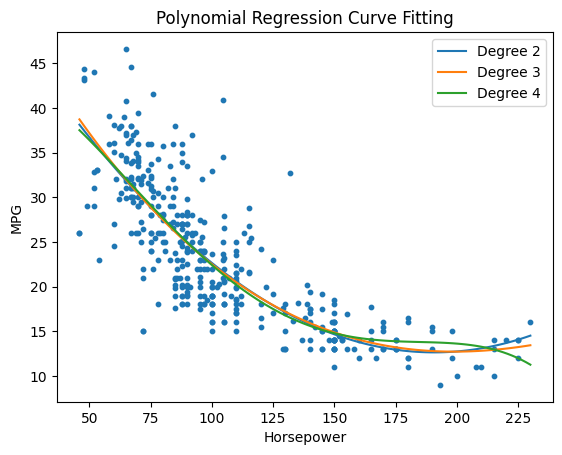

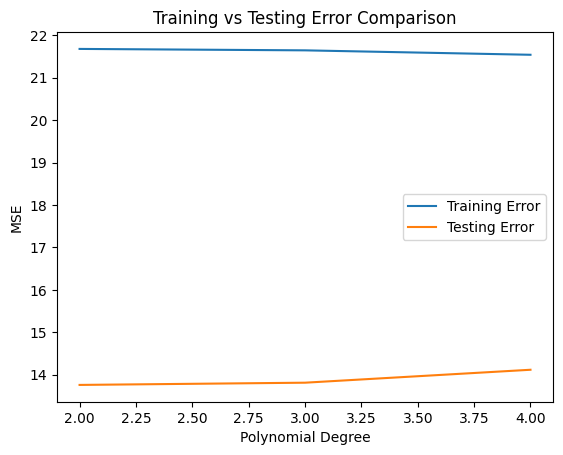

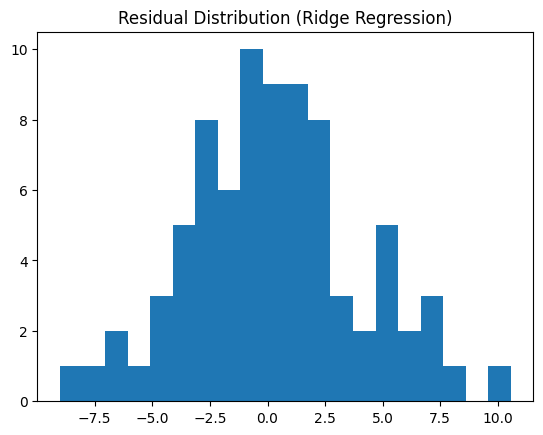

In [3]:
# Printing student details
print("Name : Priyadharshini R")
print("Roll No : 24BAD092")

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load Auto MPG dataset
df = pd.read_csv(r"/content/sample_data/auto-mpg.csv")

# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

# Convert horsepower to numeric
df["horsepower"] = pd.to_numeric(df["horsepower"])

# Drop car name column (non-numeric, not required)
df.drop("car name", axis=1, inplace=True)

# Handle missing values using mean (numeric columns only)
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)
# Select independent and dependent variables
X = df[["horsepower"]]
y = df["mpg"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# Polynomial degrees
degrees = [2, 3, 4]
results = {}

# Train Polynomial Regression models
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[d] = [mse, rmse, r2]

    print("Polynomial Degree :", d)
    print("MSE :", mse)
    print("RMSE :", rmse)
    print("R2 Score :", r2)
    print()

# Apply Ridge Regression to control overfitting (degree 4)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)

y_ridge_pred = ridge.predict(X_test_poly)

# Visualization: Polynomial curve fitting
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)

plt.figure()
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly_range = poly.fit_transform(X_range_scaled)
    model = LinearRegression()
    model.fit(poly.fit_transform(X_train), y_train)
    plt.plot(X_range, model.predict(X_poly_range), label=f"Degree {d}")

plt.scatter(X, y, s=10)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Curve Fitting")
plt.legend()
plt.show()

# Visualization: Training vs Testing Error
train_errors = []
test_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    train_errors.append(
        mean_squared_error(y_train, model.predict(X_train_poly))
    )
    test_errors.append(
        mean_squared_error(y_test, model.predict(X_test_poly))
    )

plt.figure()
plt.plot(degrees, train_errors, label="Training Error")
plt.plot(degrees, test_errors, label="Testing Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Training vs Testing Error Comparison")
plt.legend()
plt.show()

# Visualization: Residual distribution (Ridge Regression)
residuals = y_test - y_ridge_pred
plt.figure()
plt.hist(residuals, bins=20)
plt.title("Residual Distribution (Ridge Regression)")
plt.show()
